<a href="https://colab.research.google.com/github/Thecaiobr/Inteligencia-artifical/blob/main/TP1_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import modules
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import pydot
import pydotplus

In [ ]:
# import dataset
col_names = ['UserID','Gender','Age', 'AnnualSalary', 'Purchased']
dataset = pd.read_csv("/content/car_data.csv")
dataset.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
#realizando a etapa de pre-processamento, onde se transforma os dados nominais em numericos usando o labelEncoder
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                    
dataset=dataset.apply(string_to_int.fit_transform) 
dataset

,User ID,Gender,Age,AnnualSalary,Purchased
0,384,1,17,9,0
1,680,1,22,54,0
2,352,1,31,112,0
3,894,1,22,175,1
4,660,1,7,122,0
...,...,...,...,...,...
995,862,1,20,84,0
996,799,0,29,16,0
997,406,0,10,222,1
998,298,0,30,215,1


In [ ]:
#dividir nossos dados em conjunto de atributos e rótulo:
feature_cols = ['UserID','Gender','Age', 'AnnualSalary']
X = dataset[feature_cols ]                               #contains the attribute 
y = dataset.Purchased  

KeyError: ignored

In [ ]:
#dividir nossos dados em conjuntos de treinamento e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=100) 

NameError: ignored

In [ ]:
#Treinando e realizando predições
classifier = DecisionTreeClassifier(criterion="entropy")     # create a classifier object
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#Prever a resposta para o conjunto de dados de teste
y_pred= classifier.predict(X_test) 

In [ ]:
#testando a acuracia/precisao do modelo
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.885


In [ ]:
#verificando valores previstos com os valores reais para testar a acuracia
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p.head()

,Actual,Predicted
249,1,1
353,0,0
537,1,1
424,1,1
564,1,1


In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('cars.png')
Image(graph.create_png())

NameError: ignored

In [ ]:
# Importar a biblioteca para mostrar a matriz de confusão da árvore
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

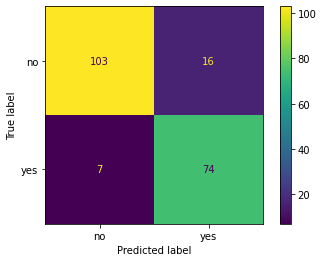

In [ ]:
conf_matrix = confusion_matrix(y_test, classifier.predict(X_test))
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=['no','yes'])
cmd.plot(values_format="d")
plt.show()

In [ ]:
# Importando bibliotecas para calcular métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# Mostrar métricas
print("Accuracy score = ", accuracy_score(y_test, classifier.predict(X_test)))
print('\n')
print(classification_report(y_test, classifier.predict(X_test)))
print('\n')

tn, fp, fn, tp = confusion_matrix(y_test, classifier.predict(X_test)).ravel()
tnr = tn / (tn + fp) # true negative rate 
fpr = fp / (tn + fp) # false positive rate 
fnr = fn / (fn + tp) # false negative rate 
tpr = tp / (tp + fn) # true positive rate
print('True negative rate: ' + str(tnr))
print('False positive rate: ' + str(fpr))
print('False negative rate: ' + str(fnr))
print('True positive rate: ' + str(tpr))

Accuracy score =  0.885


              precision    recall  f1-score   support

           0       0.94      0.87      0.90       119
           1       0.82      0.91      0.87        81

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



True negative rate: 0.865546218487395
False positive rate: 0.13445378151260504
False negative rate: 0.08641975308641975
True positive rate: 0.9135802469135802
